<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 5. Redes Neuronales Convolucionales</font></h1>

<h1><font color="#113D68" size=4>2. Reconocimiento de dígitos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. MNIST dataset](#section1)
* [2. Cargar MNIST](#section2)
* [3. Modelo de línea de base con MLP](#section3)
* [4. CNN para MNIST](#section4)
* [5. CNN más profunda para MNIST](#section5)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

En este proyecto, descubrirá cómo desarrollar un modelo de Deep Learning en la tarea de reconocimiento de dígitos manuscritos del MNIST. Después de completar esta clase sabrá:
* Cómo cargar MNIST y desarrollar un modelo de red neuronal.
* Cómo implementar y evaluar una CNN de línea base para MNIST.
* Cómo implementar un modelo de Deep Learning avanzado para MNIST.

In [ ]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. MNIST dataset</font>

MNIST toma imágenes de dígitos de una variedad de documentos escaneados, normalizados en tamaño y centrados.

Cada imagen es está dada en blanco y negro con $28 × 28$ píxeles (784 píxeles en total). Se usan 60,000 imágenes para entrenar un modelo y 10,000 imágenes para validarlo.

Es una tarea de reconocimiento de dígitos. Como tal, hay 10 dígitos (0 a 9) o 10 clases para predecir. 

En la página web de Rodrigo Benenson hay una lista de los resultados más avanzados y enlaces a los artículos relevantes sobre el MNIST y otros conjuntos de datos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre el dataset [MNIST](http://yann.lecun.com/exdb/mnist/)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Información de los resultados sobre MNIST de [Rodrigo Benenson](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Cargar MNIST</font>

El conjunto de datos se descarga automáticamente la primera vez que se llama a esta función y se almacena en su directorio de inicio en `~/.keras/datasets/mnist.pkl.gz` como un archivo de 15 megabytes. 

Primero escribiremos un pequeño script para descargar y visualizar las primeras 4 imágenes mediante la función `mnist.load data()`.

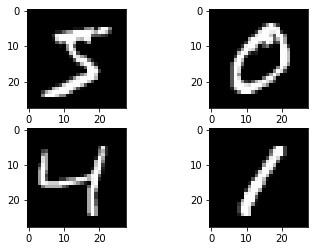

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test)= mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3],cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. MLP de línea base</font>

Vamos a usar un MLP clásico como base para la comparación con modelos de redes neuronales convolucionales. 

Importamos las clases, funciones y el dataset MNIST.

In [ ]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# load data
(x_train, y_train), (x_test, y_test)= mnist.load_data()

Para un MLP clásico debemos reducir las imágenes a un vector de píxeles. En este caso, las imágenes de tamaño $28 × 28$ serán vectores de entrada de 784 píxeles. 

Realizamos esta transformación meidante la función `reshape()`. 

Los valores de los píxeles son números enteros, por lo que los convertimos a punto flotante para poder normalizarlos.

In [ ]:
print('%d x %d' % (x_train.shape[1],x_train.shape[2]))

28 x 28


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# flatten 28*28 images to a 784 vector for each image
num_pixels= x_train.shape[1] * x_train.shape[2]

x_train= x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test= x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [ ]:
print('%d' % (x_train.shape[1]))
x_train

784


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Los valores de los píxeles están en una escala de grises entre 0 y 255. Podemos normalizar los valores de los píxeles en el rango 0 y 1 dividiendo cada valor por el máximo valor, i.e., 255.

In [ ]:
# normalize inputs from 0-255 to 0-1
x_train= x_train / 255
x_test= x_test / 255

Finalmente, la variable de salida es un número entero de 0 a 9. Por tanto, usaremos One-Hot Encoding para transformar el vector de enteros de clase en una matriz binaria. 

Usaremos para ello la función de Keras `np_utils.to_categorical()`.

In [ ]:
# one hot encode outputs
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

In [ ]:
num_classes= y_train.shape[1]
print('%d' % (num_classes))
y_train

10


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Vamos a definir nuestro modelo:
1. El número de entradas será el tamaño máximo de pixeles (784)
2. Tendrá una capa oculta con el mismo número de neuronas que entradas (784). 
3. Se utiliza una función de activación ReLU en la capa oculta. 
4. Se utiliza una función de activación Softmax en la capa de salida. 
5. La función de pérdida será `categorical_crossentropy`. 
6. Utilizaremos ADAM para aprender los pesos. 

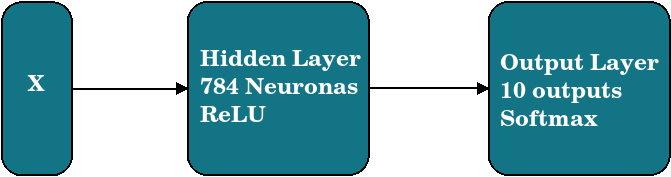

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model= Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) 
    return model

Entrenamos y evaluamos el modelo. 
1. El modelo se ajusta a más de 10 épocas con actualizaciones cada 200 imágenes. 
2. Los datos de test se utilizan como conjunto de datos de validación.
3. Se utiliza un valor `verbose` de 2. 
4. Evaluamos en test e imprimimos las métricas.

In [ ]:
# build the model
model= baseline_model()

# Fit the model
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=200,verbose=2)

# Final evaluation of the model
score= model.evaluate(x_test,y_test, verbose=0)
print('Error Modelo Base: %.2f' % (100-score[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2766 - accuracy: 0.9233 - val_loss: 0.1418 - val_accuracy: 0.9590
Epoch 2/10
300/300 - 4s - loss: 0.1118 - accuracy: 0.9669 - val_loss: 0.0939 - val_accuracy: 0.9719
Epoch 3/10
300/300 - 4s - loss: 0.0698 - accuracy: 0.9798 - val_loss: 0.0756 - val_accuracy: 0.9760
Epoch 4/10
300/300 - 4s - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.0673 - val_accuracy: 0.9798
Epoch 5/10
300/300 - 4s - loss: 0.0371 - accuracy: 0.9893 - val_loss: 0.0635 - val_accuracy: 0.9810
Epoch 6/10
300/300 - 4s - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0655 - val_accuracy: 0.9786
Epoch 7/10
300/300 - 4s - loss: 0.0189 - accuracy: 0.9953 - val_loss: 0.0593 - val_accuracy: 0.9813
Epoch 8/10
300/300 - 4s - loss: 0.0151 - accuracy: 0.9967 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 9/10
300/300 - 4s - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0595 - val_accuracy: 0.9825
Epoch 10/10
300/300 - 4s - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.0584 - val_accuracy: 0.9829

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. CNN para MNIST </font>

Ahora que hemos visto cómo cargar el conjunto de datos MNIST y entrenar un modelo simple de perceptrón multicapa en él, es hora de desarrollar una red neuronal convolucional más sofisticada o un modelo CNN. 

Crearemos una CNN simple para MNIST que demuestra cómo utilizar todos los aspectos de una implementación de CNN moderna, incluidas las capas convolucionales, las capas de agrupación y las capas de dropout. 

El primer paso es importar las clases y funciones necesarias.

In [ ]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

En Keras, las capas utilizadas para convoluciones bidimensionales esperan valores de píxeles con las dimensiones `[muestras]-[ancho]-[alto]-[canales]`. 

En cuanto al canal en MNIST, ya que está dada en escala de grises, la dimensión de píxel se establece en 1.

In [ ]:
# load data
(x_train, y_train), (x_test, y_test)= mnist.load_data()

# reshape to be [samples][width][height][channels]
x_train= x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2], 1)).astype('float32')
x_test= x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2], 1)).astype('float32')

11501568/11490434 [==============================] - 0s 0us/step


Normalizamos los valores de los píxeles en el rango 0 y 1 y realizar OHE en el target.

In [ ]:
# normalize inputs from 0-255 to 0-1
x_train= x_train / 255
x_test= x_test / 255

# one hot encode outputs
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

In [ ]:
num_classes= y_train.shape[1]
print('%d' % (num_classes))
y_train

10


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

A continuación, definimos nuestro modelo de red neuronal:

1. La primera capa oculta es una capa convolucional llamada `Conv2D`. 
    * Tiene 32 mapas de características, con un tamaño de $5 × 5$ y una función de activación ReLu.
2. Capa Pooling  `MaxPooling2D `. 
    * Tamaño de pacht de $2 × 2$.
3. Capa de regularización `Dropout`. 
4. Capa `Flatten` para conversión de la matriz 2D en un vector (1D).
5. Capa `Dense` con 128 neuronas y la función de activación ReLU.
6. Capa de salida con 10 neuronas para las 10 clases y una función de activación **Softmax**.
7. La compilación con ADAM, pérdida logarítmica como función de coste y Accuracy como métrica.

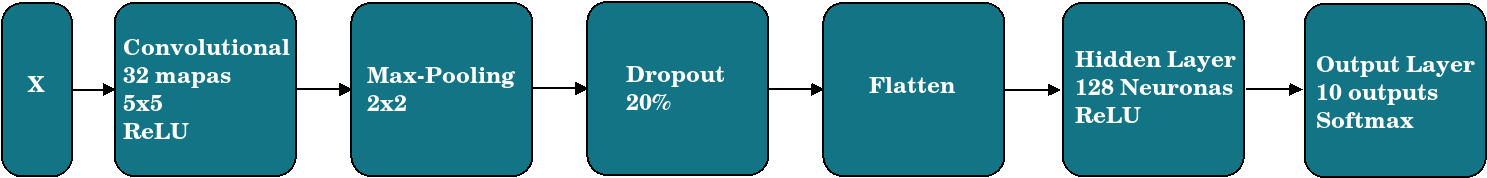

In [ ]:
# define a simple CNN model
def baseline_model():
    # create model
    model= Sequential()
    model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) 
    return model    

Entrenamos con 10 épocas a un tamaño de batch de 200.

In [ ]:
# build the model
model= baseline_model()

# Fit the model
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=200,verbose=2)

# Final evaluation of the model
score= model.evaluate(x_test,y_test, verbose=0)
print('Error Modelo Base CNN: %.2f' % (100-score[1]*100))

Epoch 1/10
300/300 - 34s - loss: 0.2435 - accuracy: 0.9300 - val_loss: 0.0805 - val_accuracy: 0.9758
Epoch 2/10
300/300 - 2s - loss: 0.0741 - accuracy: 0.9781 - val_loss: 0.0503 - val_accuracy: 0.9839
Epoch 3/10
300/300 - 2s - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.0466 - val_accuracy: 0.9845
Epoch 4/10
300/300 - 2s - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 5/10
300/300 - 2s - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0395 - val_accuracy: 0.9872
Epoch 6/10
300/300 - 2s - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9891
Epoch 7/10
300/300 - 2s - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0332 - val_accuracy: 0.9896
Epoch 8/10
300/300 - 2s - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0341 - val_accuracy: 0.9890
Epoch 9/10
300/300 - 2s - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.0339 - val_accuracy: 0.9905
Epoch 10/10
300/300 - 2s - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0341 - val_accuracy: 0.989

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6>5. CNN más profunda para MNIST </font>

Esta vez definimos una arquitectura con más capas de convolucionales, Max-pooling y capas completamente conectadas.

1. Capa convolucional con 30 mapas de tamaño $5 × 5$.
2. Capa de Pooling con patch de $2 × 2$.
3. Capa convolucional con 15 mapas de tamaño $3 × 3$.
4. Capa de Pooling con patch de $2 × 2$.
5. Capa de Dropout del 20%.
6. Capa Flatten.
7. Capa completamente conectada con 128 neuronas y ReLu.
8. Capa completamente conectada con 50 neuronas y ReLu
9. Capa de salida cpm activación Softmax.
10. La compilación con ADAM, pérdida logarítmica como función de coste y Accuracy como métrica.

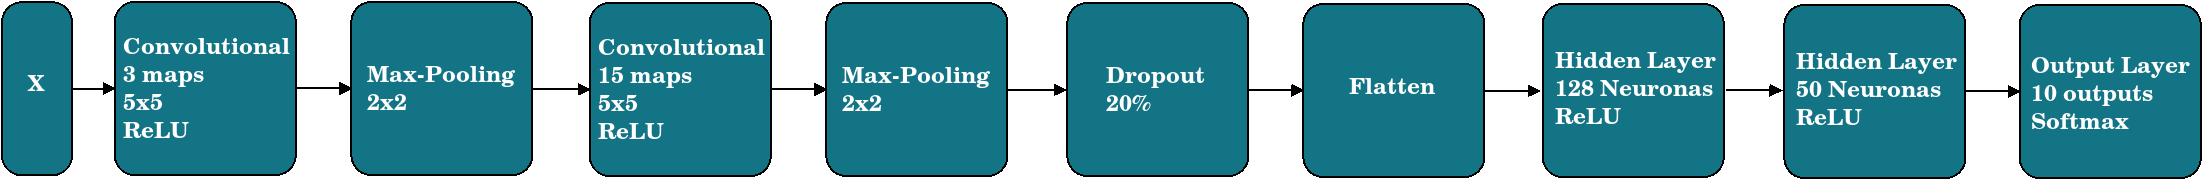

In [ ]:
def larger_model():
    # create model
    model= Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) 
    return model   


# build the model
model= larger_model()

# Fit the model
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=200,verbose=2)

# Final evaluation of the model
score= model.evaluate(x_test,y_test, verbose=0)
print('Error Modelo Base CNN: %.2f' % (100-score[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.3706 - accuracy: 0.8849 - val_loss: 0.0829 - val_accuracy: 0.9723
Epoch 2/10
300/300 - 3s - loss: 0.0995 - accuracy: 0.9695 - val_loss: 0.0509 - val_accuracy: 0.9830
Epoch 3/10
300/300 - 3s - loss: 0.0710 - accuracy: 0.9783 - val_loss: 0.0470 - val_accuracy: 0.9850
Epoch 4/10
300/300 - 3s - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0342 - val_accuracy: 0.9876
Epoch 5/10
300/300 - 3s - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0289 - val_accuracy: 0.9904
Epoch 6/10
300/300 - 3s - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0246 - val_accuracy: 0.9912
Epoch 7/10
300/300 - 3s - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0282 - val_accuracy: 0.9901
Epoch 8/10
300/300 - 3s - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0242 - val_accuracy: 0.9920
Epoch 9/10
300/300 - 3s - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0215 - val_accuracy: 0.9919
Epoch 10/10
300/300 - 3s - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0231 - val_accuracy: 0.9926

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>

Modelo de la pagina de Keras

In [ ]:
def keras_model():
    # create model
    model= Sequential()
    model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) 
    return model   


# build the model
model= keras_model()

# Fit the model
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=15,batch_size=128,verbose=2)

# Final evaluation of the model
score= model.evaluate(x_test,y_test, verbose=0)
print('Error Modelo Base CNN: %.2f' % (100-score[1]*100))



Epoch 1/15
469/469 - 5s - loss: 0.3409 - accuracy: 0.8983 - val_loss: 0.0867 - val_accuracy: 0.9749
Epoch 2/15
469/469 - 4s - loss: 0.1048 - accuracy: 0.9679 - val_loss: 0.0550 - val_accuracy: 0.9826
Epoch 3/15
469/469 - 4s - loss: 0.0787 - accuracy: 0.9763 - val_loss: 0.0421 - val_accuracy: 0.9862
Epoch 4/15
469/469 - 4s - loss: 0.0673 - accuracy: 0.9786 - val_loss: 0.0371 - val_accuracy: 0.9872
Epoch 5/15
469/469 - 4s - loss: 0.0585 - accuracy: 0.9817 - val_loss: 0.0350 - val_accuracy: 0.9881
Epoch 6/15
469/469 - 4s - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0330 - val_accuracy: 0.9886
Epoch 7/15
469/469 - 4s - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0316 - val_accuracy: 0.9889
Epoch 8/15
469/469 - 4s - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0294 - val_accuracy: 0.9895
Epoch 9/15
469/469 - 4s - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0296 - val_accuracy: 0.9894
Epoch 10/15
469/469 - 4s - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0276 - val_accuracy: 0.9899

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_tt= x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2], 1)).astype('float32')

import numpy as np
pp= model.predict(x_tt)
classes_x=np.argmax(pp,axis=1)
classes_x

array([7, 2, 1, ..., 4, 5, 6])

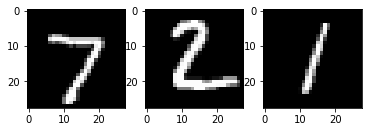

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(231)
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(x_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(x_test[2], cmap=plt.get_cmap('gray'))